Dear all,

Each group must create their branch named group_#_ass_7_2024_2 (group_1_ass_7_2024_2) and save their results in the Assignment_7 folder. Name your JN like your branch.

Import the data located at this link. It has information on people infected with dengue at the district level for 2015 to 2021.
Generate ubigeo for Departments and Provinces taking the first two and four numbers. Hint: Use this code.
Use geopandas to plot the number of cases in 2021 by the district using a continuous legend. Do not forget to indicate the color of NA values. Use this shapefile.
Use geopandas to plot the number of cases in 2021 by the province using a continuous legend. Do not forget to indicate the color of NA values. Use this shapefile. For this task, you will have to aggregate shapefiles at the province level.
Use geopandas to plot the number of cases by the department for all the years using subplots. Every subplot for each year. Do not forget to indicate the color of NA values. Use this shapefile. For this task, you will have to aggregate shapefiles at the department level.
Use geopandas to plot the number of cases by the department for all 2021 quarters using subplots. Every subplot for each quarter. Use a categorical legend with 5 bins. Do not forget to indicate the color of NA values. Use this shapefile. For this task, you will have to aggregate shapefiles at the department level. Hint: Use Semana variable to group by quarters.quarters.

In [86]:
import pandas as pd
import os

In [87]:
print(os.getcwd())

C:\Users\EQUIPO\Documents\Diplomado_PUCP\Lecture_9\Assignment_7


In [88]:
#importing data

file_path = '../../_data/data_dengue_peru.csv'
dengue = pd.read_csv(file_path)

C:\Users\EQUIPO\AppData\Local\Temp\ipykernel_8664\564652930.py:4: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  dengue = pd.read_csv(file_path)


In [89]:
dengue

,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,Ubigeo,Casos
0,2020,43,Dengue,CUSCO,MEGANTONI,LA CONVENCION,80914,2.0
1,2021,41,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN
2,2021,42,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN
3,2020,1,Dengue,CUSCO,MEGANTONI,LA CONVENCION,80914,0.0
4,2020,53,Dengue,CUSCO,MEGANTONI,LA CONVENCION,80914,2.0
...,...,...,...,...,...,...,...,...
172139,2021,49,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN
172140,2021,49,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN
172141,2021,50,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN
172142,2021,50,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN


In [90]:
# Ubigeo
## from numeric to string
dengue['Ubigeo'] = dengue['Ubigeo'].astype(str)

## adding a "0" to the cases with 5 digits
dengue['Ubigeo'] = dengue['Ubigeo'].apply(lambda x: x.zfill(6) if len(x) == 5 else x)

In [91]:
## creating Ubigeo for Departamento and Provincia

dengue['Ubigeo_Dep'] = dengue['Ubigeo'].str[:2] #Departamento
dengue['Ubigeo_Pro'] = dengue['Ubigeo'].str[:4] #Provincia

dengue

,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,Ubigeo,Casos,Ubigeo_Dep,Ubigeo_Pro
0,2020,43,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,2.0,08,0809
1,2021,41,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN,18,1801
2,2021,42,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN,18,1801
3,2020,1,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,0.0,08,0809
4,2020,53,Dengue,CUSCO,MEGANTONI,LA CONVENCION,080914,2.0,08,0809
...,...,...,...,...,...,...,...,...,...,...
172139,2021,49,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN,17,1702
172140,2021,49,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN,17,1703
172141,2021,50,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN,17,1702
172142,2021,50,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN,17,1703


In [92]:
pip install geopandas

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [93]:
import geopandas as gpd

In [94]:
# Importar las bibliotecas necesarias
import geopandas as gpd
import matplotlib.pyplot as plt

In [95]:
# Download shape file at district level

maps = gpd.read_file(r'../../_data/LIMITE_DISTRITAL_2020_INEI/INEI_LIMITE_DISTRITAL.shp')

In [96]:
maps

,CCDD,NOMBDEP,CCPP,NOMBPROV,CCDI,NOMBDIST,CAPITAL,UBIGEO,IDPROV,CODIGO,CNT_CCPP,DESCRIPCIO,DESCARGAR,WHATSAPP,CONTACTO,geometry
0,06,CAJAMARCA,05,CONTUMAZA,04,GUZMANGO,GUZMANGO,060504,0605,060504,50,GUZMANGO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-78.91578 -7.32085, -78.9137 -7.3223..."
1,06,CAJAMARCA,11,SAN MIGUEL,05,EL PRADO,EL PRADO,061105,0611,061105,15,EL PRADO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-79.01679 -6.96945, -79.01581 -6.969..."
2,06,CAJAMARCA,11,SAN MIGUEL,09,NIEPOS,NIEPOS,061109,0611,061109,41,NIEPOS,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-79.21691 -6.85171, -79.21576 -6.851..."
3,06,CAJAMARCA,11,SAN MIGUEL,10,SAN GREGORIO,SAN GREGORIO,061110,0611,061110,48,SAN GREGORIO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-79.08233 -7.00544, -79.08041 -7.005..."
4,06,CAJAMARCA,12,SAN PABLO,03,SAN LUIS,SAN LUIS GRANDE,061203,0612,061203,9,SAN LUIS,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-78.87623 -7.09747, -78.87471 -7.098..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1869,04,AREQUIPA,04,CASTILLA,04,CHACHAS,CHACHAS,040404,0404,040404,19,CHACHAS,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-71.95148 -14.83836, -71.95157 -14.8..."
1870,04,AREQUIPA,04,CASTILLA,05,CHILCAYMARCA,CHILCAYMARCA,040405,0404,040405,24,CHILCAYMARCA,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-72.3749 -15.2499, -72.37494 -15.250..."
1871,04,AREQUIPA,04,CASTILLA,06,CHOCO,CHOCO,040406,0404,040406,58,CHOCO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-71.96976 -15.13597, -71.96952 -15.1..."
1872,04,AREQUIPA,04,CASTILLA,07,HUANCARQUI,HUANCARQUI,040407,0404,040407,25,HUANCARQUI,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-72.31258 -15.81426, -72.31211 -15.8..."


In [97]:
#Check unique values
maps['CODIGO'].is_unique

True

In [98]:
maps['CODIGO'].unique().size

1874

In [101]:
# Filtrar Año 2021
dengue_2021 = dengue[dengue.Año == 2021]
dengue_2021

,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,Ubigeo,Casos,Ubigeo_Dep,Ubigeo_Pro
1,2021,41,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN,18,1801
2,2021,42,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN,18,1801
6,2021,41,Dengue,LIMA,INDEPENDENCIA,LIMA,150112,NaN,15,1501
7,2021,41,Dengue,LIMA,VILLA MARIA DEL TRIUNFO,LIMA,150143,NaN,15,1501
8,2021,41,Dengue,LIMA,ATE,LIMA,150103,NaN,15,1501
...,...,...,...,...,...,...,...,...,...,...
172139,2021,49,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN,17,1702
172140,2021,49,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN,17,1703
172141,2021,50,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN,17,1702
172142,2021,50,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN,17,1703


In [104]:
# Convertir a numérico, forzando no numéricos a NaN
dengue_2021['Casos'] = pd.to_numeric(dengue_2021['Casos'], errors='coerce')

# Convertir a tipo Int64 que soporta NaN
dengue_2021['Casos'] = dengue_2021['Casos'].astype('Int64')

# Verificar la conversión
print(dengue_2021.dtypes)

Año                 int64
Semana              int64
Eventos o daños    object
Departamento       object
Distrito           object
Provincia          object
Ubigeo             object
Casos               Int64
Ubigeo_Dep         object
Ubigeo_Pro         object
dtype: object


C:\Users\EQUIPO\AppData\Local\Temp\ipykernel_8664\3356719810.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dengue_2021['Casos'] = pd.to_numeric(dengue_2021['Casos'], errors='coerce')
C:\Users\EQUIPO\AppData\Local\Temp\ipykernel_8664\3356719810.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dengue_2021['Casos'] = dengue_2021['Casos'].astype('Int64')


In [105]:
#Agrupar por Ubigeo
dengue_2021["Casos"] = dengue_2021["Casos"].astype('Int64')

dengue_2021

C:\Users\EQUIPO\AppData\Local\Temp\ipykernel_8664\122393096.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dengue_2021["Casos"] = dengue_2021["Casos"].astype('Int64')


,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,Ubigeo,Casos,Ubigeo_Dep,Ubigeo_Pro
1,2021,41,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,<NA>,18,1801
2,2021,42,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,<NA>,18,1801
6,2021,41,Dengue,LIMA,INDEPENDENCIA,LIMA,150112,<NA>,15,1501
7,2021,41,Dengue,LIMA,VILLA MARIA DEL TRIUNFO,LIMA,150143,<NA>,15,1501
8,2021,41,Dengue,LIMA,ATE,LIMA,150103,<NA>,15,1501
...,...,...,...,...,...,...,...,...,...,...
172139,2021,49,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,<NA>,17,1702
172140,2021,49,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,<NA>,17,1703
172141,2021,50,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,<NA>,17,1702
172142,2021,50,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,<NA>,17,1703


In [106]:
#Prueba en agrupar por ubigeo

dengue_max = dengue_2021[dengue_2021.Ubigeo == "010201"]
dengue_max.groupby( [ 'Año' ], as_index = False )[ [ 'Casos' ] ].sum()

,Año,Casos
0,2021,474


In [118]:
#AGRUPAR POR UBIGEO (distrito)

dengue_2021_1 = dengue_2021.groupby( [ 'Ubigeo' ], as_index = False )[ [ 'Casos' ] ].sum()
dengue_2021_1

,Ubigeo,Casos
0,10101,0
1,10201,474
2,10202,25
3,10203,38
4,10204,8
...,...,...
464,250302,26
465,250303,32
466,250304,14
467,250305,2


In [119]:
# Máximo de casos por distrito
dengue_2021_1["Casos"].max()

2267

In [120]:
#verificar dtypes de ambas bases antes de hacer merge
print(dengue_2021_1.dtypes)
print("")
print(maps.dtypes)

Ubigeo    int64
Casos     Int64
dtype: object

CCDD            object
NOMBDEP         object
CCPP            object
NOMBPROV        object
CCDI            object
NOMBDIST        object
CAPITAL         object
UBIGEO           int64
IDPROV          object
CODIGO          object
CNT_CCPP         int64
DESCRIPCIO      object
DESCARGAR       object
WHATSAPP        object
CONTACTO        object
geometry      geometry
dtype: object


In [121]:
# Convertir ambos identificadores del merge a mismo tipo
dengue_2021_1['Ubigeo'] = dengue_2021_1['Ubigeo'].astype('int64')
maps['UBIGEO'] = maps['UBIGEO'].astype('int64')

print(dengue_2021_1.dtypes)
print(maps.dtypes)

Ubigeo    int64
Casos     Int64
dtype: object
CCDD            object
NOMBDEP         object
CCPP            object
NOMBPROV        object
CCDI            object
NOMBDIST        object
CAPITAL         object
UBIGEO           int64
IDPROV          object
CODIGO          object
CNT_CCPP         int64
DESCRIPCIO      object
DESCARGAR       object
WHATSAPP        object
CONTACTO        object
geometry      geometry
dtype: object


In [112]:
import pandas as pd

# Realizar la fusión de datasets
dg_map1 = maps.merge(dengue_2021, left_on='UBIGEO', right_on='Ubigeo', how='left')

# Comprobar el máximo valor en la columna "Casos"
max_casos = dg_map1["Casos"].max()
print("El máximo de casos es:", max_casos)

# Comprobar la forma del dataframe fusionado
print("Forma del dataframe fusionado:", dg_map1.shape)

# Mostrar las primeras filas del dataframe fusionado
print(dg_map1.head())

El máximo de casos es: 232
Forma del dataframe fusionado: (26262, 26)
  CCDD    NOMBDEP CCPP    NOMBPROV CCDI      NOMBDIST          CAPITAL  \
0   06  CAJAMARCA   05   CONTUMAZA   04      GUZMANGO         GUZMANGO   
1   06  CAJAMARCA   11  SAN MIGUEL   05      EL PRADO         EL PRADO   
2   06  CAJAMARCA   11  SAN MIGUEL   09        NIEPOS           NIEPOS   
3   06  CAJAMARCA   11  SAN MIGUEL   10  SAN GREGORIO     SAN GREGORIO   
4   06  CAJAMARCA   12   SAN PABLO   03      SAN LUIS  SAN LUIS GRANDE   

   UBIGEO IDPROV  CODIGO  ...  Año Semana Eventos o daños Departamento  \
0   60504   0605  060504  ...  NaN    NaN             NaN          NaN   
1   61105   0611  061105  ...  NaN    NaN             NaN          NaN   
2   61109   0611  061109  ...  NaN    NaN             NaN          NaN   
3   61110   0611  061110  ...  NaN    NaN             NaN          NaN   
4   61203   0612  061203  ...  NaN    NaN             NaN          NaN   

  Distrito Provincia  Ubigeo  Casos Ubig

In [122]:
#Merge datasets
dg_map1 = maps.merge(dengue_2021_1, left_on='UBIGEO', right_on='Ubigeo', how='left')

#Check if it is correct
dg_map1["Casos"].max()

2267

In [123]:
# Verify dtypes
dg_map1.dtypes

CCDD            object
NOMBDEP         object
CCPP            object
NOMBPROV        object
CCDI            object
NOMBDIST        object
CAPITAL         object
UBIGEO           int64
IDPROV          object
CODIGO          object
CNT_CCPP         int64
DESCRIPCIO      object
DESCARGAR       object
WHATSAPP        object
CONTACTO        object
geometry      geometry
Ubigeo         float64
Casos            Int64
dtype: object

In [124]:
# Change "Casos" to a readable type by geopandas
dg_map1["Casos"] = dg_map1["Casos"].astype("float64")
dg_map1['Casos'].dtype

dtype('float64')

<Axes: >

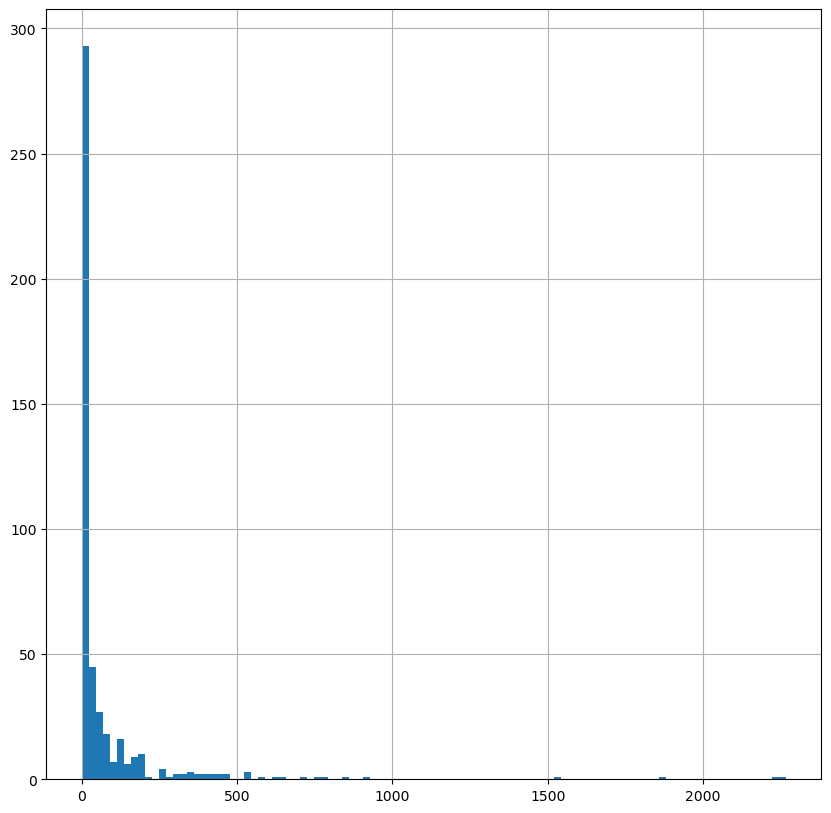

In [125]:
# First always check the distribution|
fig, ax = plt.subplots(figsize=(10, 10))
dg_map1["Casos"].hist(bins = 100)

#check the distribution of the variables BEFORE PLOTTING

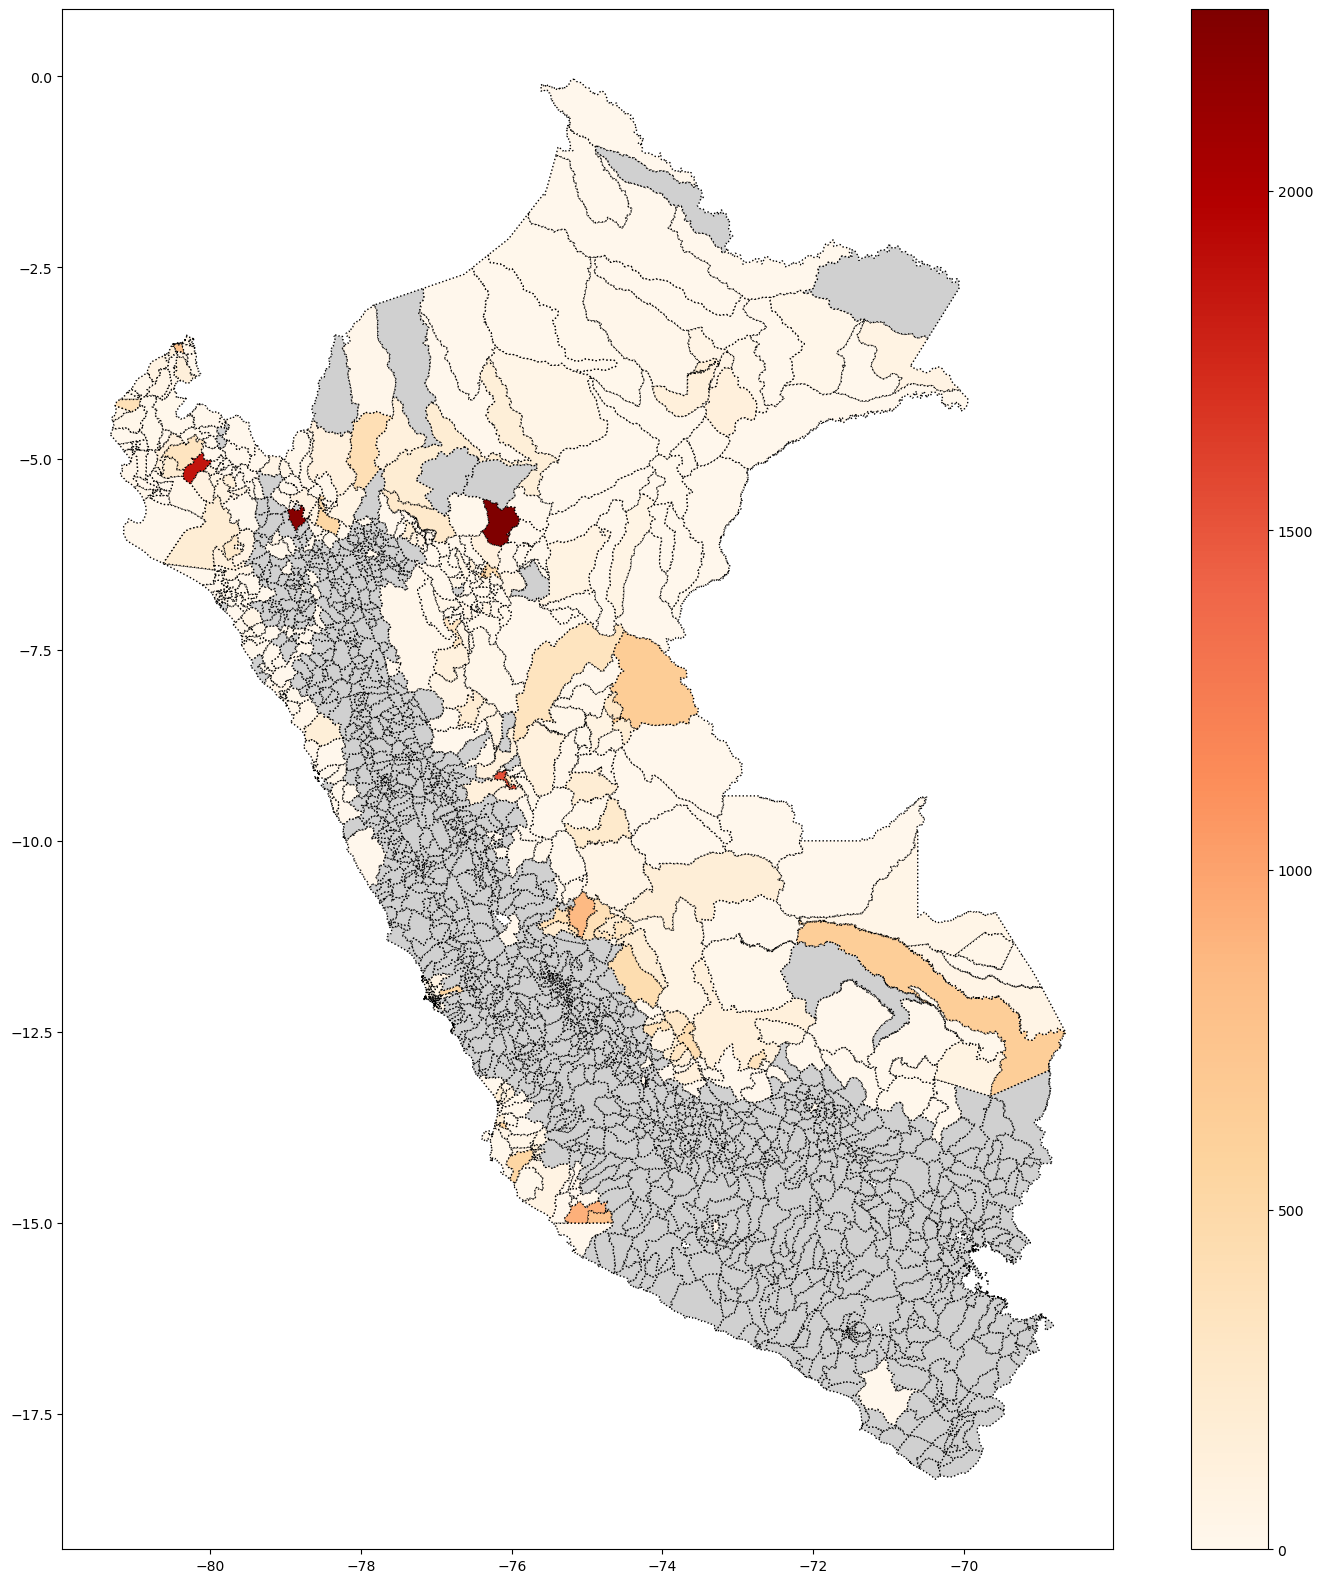

In [126]:
cmap = plt.cm.OrRd
dg_map1.plot( figsize = (20 , 20 ), 
             column = 'Casos', 
             cmap = cmap, 
             linestyle = 'dotted', 
             edgecolor = 'black', 
             legend = True, 
             missing_kwds = dict( color = '#D0D0D0' ) )
plt.show()